<a href="https://colab.research.google.com/github/sabahomarkm/Improved-Cyber-Attack-Detection-using-Machine-Learning/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 454.3MB 35kB/s 


In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import  drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Improved Cyber Attack Detection using Machine Learning/Dataset/Hz-CTU13_1.csv')
df.head()

,src,src_port,dst,dst_port,original_dataset,original_label,event_generator,event_signature,event_priority,ndpi_risk,ndpi_detected_protocol,payload_bytes_first,packet_pay_size-3,C_packets_rst_avg,packet_pay_size-2,dst2src_packets_rate,C_packets_rst_min,C_packets_urg_avg,src2dst_packets_rate,C_packets_fin_avg,C_idletime_max,http_response_status_code,packet_header_size-4,dst2src_inter_time_std,packet_header_size-0,C_packets_rst_std,payload_bytes_max,src2dst_header_bytes_min,C_dst2src_packets_rate_max,packet_pay_size-8,dst2src_header_bytes_min,http_request_version,src2dst_header_bytes_max,dns_query_type,payload_bytes_avg,dst2src_header_bytes_std,C_dst2src_packets_rate_min,C_packets_syn_std,C_src2dst_packets_rate_max,packet_header_size-7,...,packets_urg,packet_direction-8,dst2src_pay_bytes_rate,src2dst_inter_time_avg,dns_rsp_type,flow_idle_time,packet_header_size-3,inter_time-0,C_dst2src_pay_bytes_min,dst2src_pay_bytes_std,C_src2dst_header_bytes_avg,C_dst2src_packets_avg,bytes,packets_without_payload,C_tcp_retransmissions_avg,inter_time-1,C_src2dst_pay_bytes_rate_max,inter_time-4,C_dst2src_pay_bytes_max,packet_pay_size-6,dst2src_pay_bytes,payload_bytes_min,tcp_retransmissions,C_packets_fin_min,C_dst2src_packets_rate_avg,dst2src_inter_time_avg,packet_header_size-5,packet_pay_size-1,packet_header_size-10,C_dst2src_pay_bytes_rate_std,src2dst_pay_bytes_std,C_idletime_min,C_src2dst_header_bytes_std,src2dst_pay_bytes_avg,packet_pay_size-9,packet_direction-2,C_src2dst_header_bytes_min,C_dst2src_packets_min,C_packets_urg_max,C_dst2src_pay_bytes_rate_min
0,147.32.84.165,137,147.32.84.255,137,CTU13/1,NaN,NaN,NaN,NaN,Acceptable,10/NetBIOS,68,68,0,68,0,0,0,0,0,152788,-1,28,0,28,0,68,28,0,50,0,-1,28,-1,59,0,0,0,4,28,...,0,1,0,5217,-1,286661,28,0,0,0,324,0,5912,0,0,0,0,420,0,68,0,50,0,0,0,0,28,68,28,0,9,1763,258,59,50,1,168,0,0,0
1,147.32.84.165,1025,147.32.80.9,53,CTU13/1,From-Botnet-V42-UDP-DNS,NaN,NaN,NaN,Acceptable,5/DNS,22,45,0,97,0,0,0,0,0,116131,-1,28,29888,28,0,461,28,1000,102,28,-1,28,-1,65,0,0,0,2000,28,...,0,0,0,7762,-1,333718,28,0,69,93,68,1,6798,0,0,0,78,0,461,29,2682,22,0,0,228,17993,28,22,28,49,5,1001,23,33,35,0,56,0,0,0
2,147.32.84.165,1027,74.125.232.195,80,CTU13/1,From-Botnet-V42-TCP-HTTP-Google-Net-Established-6,NaN,NaN,NaN,Safe,7.126/HTTP.Google,0,0,0,0,66,0,0,177,0,0,-1,40,7,48,0,393,40,30,77,40,-1,48,-1,78,3,30,0,60,40,...,0,0,1,5,-1,12,40,0,77,0,80,1,1481,8,0,0,23,0,77,393,77,0,0,0,30,14,40,0,40,0,0,0,0,393,0,0,80,1,0,2
3,147.32.84.165,138,147.32.84.255,138,CTU13/1,NaN,NaN,NaN,NaN,Acceptable,10/NetBIOS,201,178,0,178,0,0,0,0,0,263902,-1,28,0,28,0,201,28,0,201,0,-1,28,-1,194,0,0,0,0,28,...,0,1,0,60680,-1,1334972,28,0,0,0,61,0,5202,0,0,0,0,0,0,174,0,174,0,0,0,0,28,201,28,0,9,4013,16,194,201,1,56,0,0,0
4,147.32.84.165,1035,239.255.255.250,1900,CTU13/1,NaN,NaN,NaN,NaN,Acceptable,12/SSDP,133,133,0,133,0,0,0,0,0,3005,-1,28,0,28,0,133,28,0,-1,0,-1,28,-1,133,0,0,0,0,-1,...,0,-1,0,1001,-1,6007,28,0,0,0,56,0,1050,0,0,0,0,3005,0,-1,0,133,0,0,0,0,28,133,-1,0,0,3002,0,133,-1,1,56,0,0,0


In [5]:
# checking number of rows and columns
df.shape

(12955, 204)

In [6]:
df.describe()

,src_port,dst_port,event_generator,event_signature,event_priority,payload_bytes_first,packet_pay_size-3,C_packets_rst_avg,packet_pay_size-2,dst2src_packets_rate,C_packets_rst_min,C_packets_urg_avg,src2dst_packets_rate,C_packets_fin_avg,C_idletime_max,http_response_status_code,packet_header_size-4,dst2src_inter_time_std,packet_header_size-0,C_packets_rst_std,payload_bytes_max,src2dst_header_bytes_min,C_dst2src_packets_rate_max,packet_pay_size-8,dst2src_header_bytes_min,http_request_version,src2dst_header_bytes_max,dns_query_type,payload_bytes_avg,dst2src_header_bytes_std,C_dst2src_packets_rate_min,C_packets_syn_std,C_src2dst_packets_rate_max,packet_header_size-7,C_packets_syn_max,C_tcp_retransmissions_max,packets_fin,src2dst_pay_bytes,packet_header_size-6,dst2src_packets,...,packets_urg,packet_direction-8,dst2src_pay_bytes_rate,src2dst_inter_time_avg,dns_rsp_type,flow_idle_time,packet_header_size-3,inter_time-0,C_dst2src_pay_bytes_min,dst2src_pay_bytes_std,C_src2dst_header_bytes_avg,C_dst2src_packets_avg,bytes,packets_without_payload,C_tcp_retransmissions_avg,inter_time-1,C_src2dst_pay_bytes_rate_max,inter_time-4,C_dst2src_pay_bytes_max,packet_pay_size-6,dst2src_pay_bytes,payload_bytes_min,tcp_retransmissions,C_packets_fin_min,C_dst2src_packets_rate_avg,dst2src_inter_time_avg,packet_header_size-5,packet_pay_size-1,packet_header_size-10,C_dst2src_pay_bytes_rate_std,src2dst_pay_bytes_std,C_idletime_min,C_src2dst_header_bytes_std,src2dst_pay_bytes_avg,packet_pay_size-9,packet_direction-2,C_src2dst_header_bytes_min,C_dst2src_packets_min,C_packets_urg_max,C_dst2src_pay_bytes_rate_min
count,12955.000000,12955.000000,449.000000,449.000000,449.000000,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,12955.0,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,12955.0,12955.000000,12955.000000,12955.000000,12955.000000,12955.00000,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,12955.0,12955.000000,12955.000000,12955.0,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,...,12955.0,12955.000000,12955.000000,12955.000000,12955.000000,1.295500e+04,12955.000000,12955.0,12955.000000,12955.000000,12955.000000,12955.000000,1.295500e+04,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,12955.0,12955.000000
mean,2723.592281,1401.525743,29.229399,13037.893096,1.378619,10.358858,4.974759,0.000309,40.762022,8.771208,0.000309,0.0,13.569896,0.004245,19760.136472,10.120340,33.775994,7331.430953,42.483906,0.0,120.961405,41.748977,10.446314,41.108915,12.49587,-0.839830,42.495176,-0.977769,33.025473,0.224932,5.399537,0.0,25.696951,7.927364,0.0,0.246700,0.186646,666.103126,8.057816,5.652103,...,0.0,-0.700579,0.375994,4576.980239,-0.995909,6.203025e+04,35.102509,0.0,242.683520,12.289232,38.216133,0.623157,2.487098e+03,11.035739,0.178387,111.348591,2.861058,3567.216442,428.093555,38.072019,721.380934,10.109456,0.504593,0.004168,6.849325,6368.049711,33.599768,9.558549,6.492706,0.673099,4.601853,8601.567734,9.461443,41.565342,12.812273,0.604631,29.082516,0.507835,0.0,1.614898
std,1699.991656,6723.296856,51.520180,7257.277388,0.737447,33.848830,22.829690,0.027782,82.000907,107.382152,0.027782,0.0,175.323635,0.079933,85607.248956,52.558014,20.094539,32474.307484,9.775105,0.0,380.060874,9.621129,90.572463,173.583499,15.90348,0.534487,9.808056,0.518427,67.874086,0.774903,45.874666,0.0,205.437932,16.711727,0.0,2.494823,0.762963,12013.612500,16.867766,202.368983,...,0.0,0.592367,3.132471,16277.665347,0.063833,3.671735e+05,19.387506,0.0,2737.301619,83.420290,186.995313,2.504130,3.988335e+04,391.495908,1.786565,1502.417657,31.206358,8299.047464,3995.903110,125.259387,8877.259170,33.639920,

In [7]:
#checking for null values 

null_countdf=df.isnull().mean()*100
null_countdf[null_countdf>0]

original_label      0.586646
event_generator    96.534157
event_signature    96.534157
event_priority     96.534157
dtype: float64

In [8]:
# since the columns event_generator,event_signature and event_priority are having more than 96% null values ,we will drop these columns

df.drop(['original_label','event_generator','event_signature','event_priority'],axis=1,inplace=True)

In [9]:
null_countdf=df.isnull().mean()*100
null_countdf[null_countdf>0]

Series([], dtype: float64)

In [10]:
#printing object column
objcolmns=df.select_dtypes(include='object').columns
objcolmns

Index(['src', 'dst', 'original_dataset', 'ndpi_risk', 'ndpi_detected_protocol',
       'protocol', 'http_content_type'],
      dtype='object')

In [11]:
#finding the count cotagorical value in each column
for objcol in objcolmns:
  print(objcol,"---",len(df[objcol].value_counts()))

src --- 93
dst --- 3795
original_dataset --- 1
ndpi_risk --- 4
ndpi_detected_protocol --- 24
protocol --- 4
http_content_type --- 15


In [12]:
#creating a list and adding column which contain morethan 10 catogorical value
lstnotreqcol=list()
for objcol in objcolmns:
  if len(df[objcol].value_counts())>10:
    lstnotreqcol.append(objcol)
lstnotreqcol

['src', 'dst', 'ndpi_detected_protocol', 'http_content_type']

In [13]:
# Droping column with more value counts
df.drop(lstnotreqcol,axis=1,inplace=True)
objcolumns=df.select_dtypes(include='object').columns
objcolumns

Index(['original_dataset', 'ndpi_risk', 'protocol'], dtype='object')

In [14]:
print(len(df['ndpi_risk'].value_counts()))
df['ndpi_risk'].value_counts()

4


Unrated       8214
Acceptable    4594
Safe           137
Unsafe          10
Name: ndpi_risk, dtype: int64

In [15]:
len(df.columns)

196

In [16]:
ndpiriskdf=pd.get_dummies(df['ndpi_risk'],drop_first=True)
ndpiriskdf.head()

,Safe,Unrated,Unsafe
0,0,0,0
1,0,0,0
2,1,0,0
3,0,0,0
4,0,0,0


In [17]:
df['protocol'].value_counts()

TCP     9066
UDP     3782
ICMP     105
254        2
Name: protocol, dtype: int64

In [18]:
protocoldf=pd.get_dummies(df['protocol'],drop_first=True)
protocoldf.head()

,ICMP,TCP,UDP
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [19]:
df['original_dataset']

0        CTU13/1
1        CTU13/1
2        CTU13/1
3        CTU13/1
4        CTU13/1
          ...   
12950    CTU13/1
12951    CTU13/1
12952    CTU13/1
12953    CTU13/1
12954    CTU13/1
Name: original_dataset, Length: 12955, dtype: object

In [20]:
df.drop(['original_dataset','ndpi_risk','protocol'],axis=1,inplace=True)

In [21]:
#merging new column in to dataset
df2=pd.concat([df,ndpiriskdf,protocoldf],axis=1)

In [22]:
df2.head()

,src_port,dst_port,payload_bytes_first,packet_pay_size-3,C_packets_rst_avg,packet_pay_size-2,dst2src_packets_rate,C_packets_rst_min,C_packets_urg_avg,src2dst_packets_rate,C_packets_fin_avg,C_idletime_max,http_response_status_code,packet_header_size-4,dst2src_inter_time_std,packet_header_size-0,C_packets_rst_std,payload_bytes_max,src2dst_header_bytes_min,C_dst2src_packets_rate_max,packet_pay_size-8,dst2src_header_bytes_min,http_request_version,src2dst_header_bytes_max,dns_query_type,payload_bytes_avg,dst2src_header_bytes_std,C_dst2src_packets_rate_min,C_packets_syn_std,C_src2dst_packets_rate_max,packet_header_size-7,C_packets_syn_max,C_tcp_retransmissions_max,packets_fin,src2dst_pay_bytes,packet_header_size-6,dst2src_packets,inter_time-10,C_packets_ack_avg,src2dst_header_bytes,...,packet_header_size-3,inter_time-0,C_dst2src_pay_bytes_min,dst2src_pay_bytes_std,C_src2dst_header_bytes_avg,C_dst2src_packets_avg,bytes,packets_without_payload,C_tcp_retransmissions_avg,inter_time-1,C_src2dst_pay_bytes_rate_max,inter_time-4,C_dst2src_pay_bytes_max,packet_pay_size-6,dst2src_pay_bytes,payload_bytes_min,tcp_retransmissions,C_packets_fin_min,C_dst2src_packets_rate_avg,dst2src_inter_time_avg,packet_header_size-5,packet_pay_size-1,packet_header_size-10,C_dst2src_pay_bytes_rate_std,src2dst_pay_bytes_std,C_idletime_min,C_src2dst_header_bytes_std,src2dst_pay_bytes_avg,packet_pay_size-9,packet_direction-2,C_src2dst_header_bytes_min,C_dst2src_packets_min,C_packets_urg_max,C_dst2src_pay_bytes_rate_min,Safe,Unrated,Unsafe,ICMP,TCP,UDP
0,137,137,68,68,0,68,0,0,0,0,0,152788,-1,28,0,28,0,68,28,0,50,0,-1,28,-1,59,0,0,0,4,28,0,0,0,3476,28,0,330,0,1624,...,28,0,0,0,324,0,5912,0,0,0,0,420,0,68,0,50,0,0,0,0,28,68,28,0,9,1763,258,59,50,1,168,0,0,0,0,0,0,0,0,1
1,1025,53,22,45,0,97,0,0,0,0,0,116131,-1,28,29888,28,0,461,28,1000,102,28,-1,28,-1,65,0,0,0,2000,28,0,0,0,1470,28,19,0,0,1232,...,28,0,69,93,68,1,6798,0,0,0,78,0,461,29,2682,22,0,0,228,17993,28,22,28,49,5,1001,23,33,35,0,56,0,0,0,0,0,0,0,0,1
2,1027,80,0,0,0,0,66,0,0,177,0,0,-1,40,7,48,0,393,40,30,77,40,-1,48,-1,78,3,30,0,60,40,0,0,0,786,40,3,0,3,336,...,40,0,77,0,80,1,1481,8,0,0,23,0,77,393,77,0,0,0,30,14,40,0,40,0,0,0,0,393,0,0,80,1,0,2,1,0,0,0,1,0
3,138,138,201,178,0,178,0,0,0,0,0,263902,-1,28,0,28,0,201,28,0,201,0,-1,28,-1,194,0,0,0,0,28,0,0,0,4278,28,0,119456,0,616,...,28,0,0,0,61,0,5202,0,0,0,0,0,0,174,0,174,0,0,0,0,28,201,28,0,9,4013,16,194,201,1,56,0,0,0,0,0,0,0,0,1
4,1035,1900,133,133,0,133,0,0,0,0,0,3005,-1,28,0,28,0,133,28,0,-1,0,-1,28,-1,133,0,0,0,0,-1,0,0,0,798,-1,0,-1,0,168,...,28,0,0,0,56,0,1050,0,0,0,0,3005,0,-1,0,133,0,0,0,0,28,133,-1,0,0,3002,0,133,-1,1,56,0,0,0,0,0,0,0,0,1


In [23]:
#Checking for null values 
df2clmns = df2.isnull().sum()
for key,value in df2clmns.iteritems():
  print(key,",",value)

src_port , 0
dst_port , 0
payload_bytes_first , 0
packet_pay_size-3 , 0
C_packets_rst_avg , 0
packet_pay_size-2 , 0
dst2src_packets_rate , 0
C_packets_rst_min , 0
C_packets_urg_avg , 0
src2dst_packets_rate , 0
C_packets_fin_avg , 0
C_idletime_max , 0
http_response_status_code , 0
packet_header_size-4 , 0
dst2src_inter_time_std , 0
packet_header_size-0 , 0
C_packets_rst_std , 0
payload_bytes_max , 0
src2dst_header_bytes_min , 0
C_dst2src_packets_rate_max , 0
packet_pay_size-8 , 0
dst2src_header_bytes_min , 0
http_request_version , 0
src2dst_header_bytes_max , 0
dns_query_type , 0
payload_bytes_avg , 0
dst2src_header_bytes_std , 0
C_dst2src_packets_rate_min , 0
C_packets_syn_std , 0
C_src2dst_packets_rate_max , 0
packet_header_size-7 , 0
C_packets_syn_max , 0
C_tcp_retransmissions_max , 0
packets_fin , 0
src2dst_pay_bytes , 0
packet_header_size-6 , 0
dst2src_packets , 0
inter_time-10 , 0
C_packets_ack_avg , 0
src2dst_header_bytes , 0
inter_time-9 , 0
C_idletime_std , 0
C_dst2src_pay_byte

In [24]:
# checking class balance of target variable 
df2['detection_completed'].value_counts()

0    7815
1    5140
Name: detection_completed, dtype: int64

In [25]:
X= df2.drop('detection_completed', axis=1)
Y= df2['detection_completed']

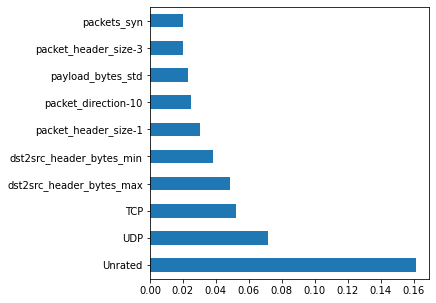

In [26]:
#selecting most importent 10 feature
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,Y)
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
plt.figure(figsize=(5,5))
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split,GridSearchCV
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=1)

In [28]:
xtrain.shape

(10364, 198)

In [29]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier=RandomForestClassifier()
random_forest_classifier.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred=random_forest_classifier.predict(xtest)
print("Confusion Matrix:")
print("  ")
print(confusion_matrix(ytest,y_pred))
print("---------------")
print("  ")
print("Accuracy Score:")
print("  ")
print(accuracy_score(ytest,y_pred))
print("  ")
print("---------------")
print("  ")
print("Classification Report:")
print("  ")
print(classification_report(ytest,y_pred))

Confusion Matrix:
  
[[1557    1]
 [   0 1033]]
---------------
  
Accuracy Score:
  
0.9996140486298727
  
---------------
  
Classification Report:
  
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1558
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2591
   macro avg       1.00      1.00      1.00      2591
weighted avg       1.00      1.00      1.00      2591



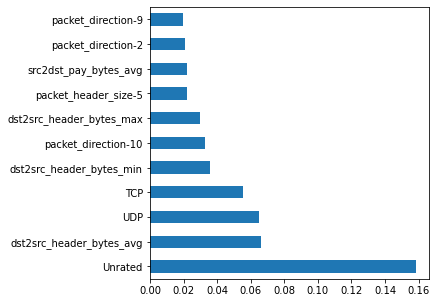

In [31]:
#selecting most importent 11 feature
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,Y)
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
plt.figure(figsize=(5,5))
ranked_features.nlargest(11).plot(kind='barh')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split,GridSearchCV
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=1)

In [33]:
xtrain.shape

(10364, 198)

In [34]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier=RandomForestClassifier()
random_forest_classifier.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred=random_forest_classifier.predict(xtest)
print("Confusion Matrix:")
print("  ")
print(confusion_matrix(ytest,y_pred))
print("---------------")
print("  ")
print("Accuracy Score:")
print("  ")
print(accuracy_score(ytest,y_pred))
print("  ")
print("---------------")
print("  ")
print("Classification Report:")
print("  ")
print(classification_report(ytest,y_pred))

Confusion Matrix:
  
[[1557    1]
 [   0 1033]]
---------------
  
Accuracy Score:
  
0.9996140486298727
  
---------------
  
Classification Report:
  
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1558
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2591
   macro avg       1.00      1.00      1.00      2591
weighted avg       1.00      1.00      1.00      2591



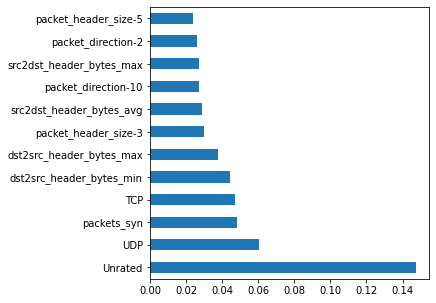

In [36]:
#selecting most importent 12 feature
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,Y)
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
plt.figure(figsize=(5,5))
ranked_features.nlargest(12).plot(kind='barh')
plt.show()

In [37]:
from sklearn.model_selection import train_test_split,GridSearchCV
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=1)

In [38]:
xtrain.shape

(10364, 198)

In [39]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier=RandomForestClassifier()
random_forest_classifier.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred=random_forest_classifier.predict(xtest)
print("Confusion Matrix:")
print("  ")
print(confusion_matrix(ytest,y_pred))
print("---------------")
print("  ")
print("Accuracy Score:")
print("  ")
print(accuracy_score(ytest,y_pred))
print("  ")
print("---------------")
print("  ")
print("Classification Report:")
print("  ")
print(classification_report(ytest,y_pred))

Confusion Matrix:
  
[[1557    1]
 [   0 1033]]
---------------
  
Accuracy Score:
  
0.9996140486298727
  
---------------
  
Classification Report:
  
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1558
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2591
   macro avg       1.00      1.00      1.00      2591
weighted avg       1.00      1.00      1.00      2591



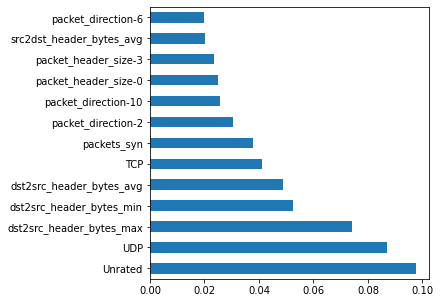

In [41]:
#selecting most importent 13 feature
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,Y)
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
plt.figure(figsize=(5,5))
ranked_features.nlargest(13).plot(kind='barh')
plt.show()

In [42]:
from sklearn.model_selection import train_test_split,GridSearchCV
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=1)

In [43]:
xtrain.shape

(10364, 198)

In [44]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier=RandomForestClassifier()
random_forest_classifier.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred=random_forest_classifier.predict(xtest)
print("Confusion Matrix:")
print("  ")
print(confusion_matrix(ytest,y_pred))
print("---------------")
print("  ")
print("Accuracy Score:")
print("  ")
print(accuracy_score(ytest,y_pred))
print("  ")
print("---------------")
print("  ")
print("Classification Report:")
print("  ")
print(classification_report(ytest,y_pred))

Confusion Matrix:
  
[[1557    1]
 [   0 1033]]
---------------
  
Accuracy Score:
  
0.9996140486298727
  
---------------
  
Classification Report:
  
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1558
           1       1.00      1.00      1.00      1033

    accuracy                           1.00      2591
   macro avg       1.00      1.00      1.00      2591
weighted avg       1.00      1.00      1.00      2591



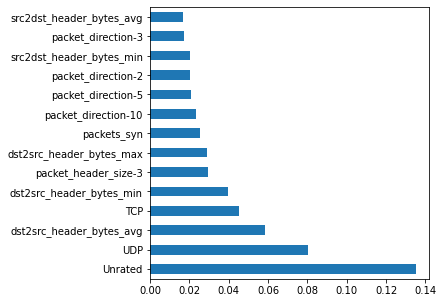

In [46]:
#selecting most importent 14 feature
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,Y)
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
plt.figure(figsize=(5,5))
ranked_features.nlargest(14).plot(kind='barh')
plt.show()

In [47]:
from sklearn.model_selection import train_test_split,GridSearchCV
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=1)

In [48]:
xtrain.shape

(10364, 198)

In [49]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier=RandomForestClassifier()
random_forest_classifier.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

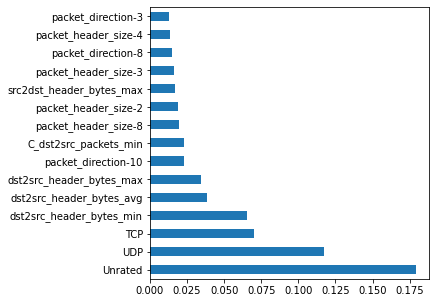

In [50]:
#selecting most importent 15 feature
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,Y)
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
plt.figure(figsize=(5,5))
ranked_features.nlargest(15).plot(kind='barh')
plt.show()

In [51]:
from sklearn.model_selection import train_test_split,GridSearchCV
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=1)

In [52]:
xtrain.shape

(10364, 198)

In [53]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier=RandomForestClassifier()
random_forest_classifier.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)